# EMOTIONS DATABASE 

Primeiramente, vamos importar as bibliotecas necessárias para a aleitura dos dados

In [1]:
from scipy.io import arff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [2]:
emotions = arff.loadarff('multilabel-classification-emotions/emotions.arff')
emotions = pd.DataFrame(emotions[0])
emotions

,Mean_Acc1298_Mean_Mem40_Centroid,Mean_Acc1298_Mean_Mem40_Rolloff,Mean_Acc1298_Mean_Mem40_Flux,Mean_Acc1298_Mean_Mem40_MFCC_0,Mean_Acc1298_Mean_Mem40_MFCC_1,Mean_Acc1298_Mean_Mem40_MFCC_2,Mean_Acc1298_Mean_Mem40_MFCC_3,Mean_Acc1298_Mean_Mem40_MFCC_4,Mean_Acc1298_Mean_Mem40_MFCC_5,Mean_Acc1298_Mean_Mem40_MFCC_6,...,BH_HighLowRatio,BHSUM1,BHSUM2,BHSUM3,amazed-suprised,happy-pleased,relaxing-calm,quiet-still,sad-lonely,angry-aggresive
0,0.034741,0.089665,0.091225,-73.302422,6.215179,0.615074,2.037160,0.804065,1.301409,0.558576,...,2.0,0.245457,0.105065,0.405399,b'0',b'1',b'1',b'0',b'0',b'0'
1,0.081374,0.272747,0.085733,-62.584437,3.183163,-0.218145,0.163038,0.620251,0.458514,0.041426,...,2.0,0.343547,0.276366,0.710924,b'1',b'0',b'0',b'0',b'0',b'1'
2,0.110545,0.273567,0.084410,-65.235325,2.794964,0.639047,1.281297,0.757896,0.489412,0.627636,...,3.0,0.188693,0.045941,0.457372,b'0',b'1',b'0',b'0',b'0',b'1'
3,0.042481,0.199281,0.093447,-80.305152,5.824409,0.648848,1.754870,1.495532,0.739909,0.809644,...,2.0,0.102839,0.241934,0.351009,b'0',b'0',b'1',b'0',b'0',b'0'
4,0.074550,0.140880,0.079789,-93.697749,5.543229,1.064262,0.899152,0.890336,0.702328,0.490685,...,2.0,0.195196,0.310801,0.683817,b'0',b'0',b'0',b'1',b'0',b'0'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588,0.027142,0.047551,0.072043,-79.881347,8.119313,1.927310,1.696017,0.397888,0.857559,0.302742,...,2.0,0.261742,0.002657,1.149211,b'0',b'0',b'1',b'1',b'1',b'0'
589,0.094829,0.204498,0.082824,-61.364436,2.966229,0.627740,1.440352,0.856243,1.110282,0.394450,...,2.0,0.282122,0.052218,0.335371,b'1',b'0',b'0',b'0',b'1',b'1'
590,0.035169,0.065403,0.075227,-81.750533,10.311701,0.092224,0.818851,1.569606,1.831909,0.057216,...,2.0,0.184313,0.247136,0.476993,b'0',b'0',b'1',b'1',b'1',b'0'
591,0.054276,0.238158,0.095935,-71.009724,3.181340,1.547197,2.407780,0.618838,0.997950,0.825143,...,2.0,0.547126,0.183494,1.255820,b'0',b'1',b'1',b'0',b'0',b'0'


É possível ver que cada uma das colunas das emoções está em binário

In [3]:
#converte os valores das emoções de binário para float
emotions = emotions.astype(float)
emotions['amazed-suprised'].head()

0    0.0
1    1.0
2    0.0
3    0.0
4    0.0
Name: amazed-suprised, dtype: float64

## Dados faltantes e duplicados 

In [4]:
emotions.isnull().sum().sum()

0

In [5]:
emotions.duplicated().sum()

0

Não existe problemas de duplicatas ou dados faltantes nesse dataset

## Correlação

Nesse tópico será observada a correlação entre cada um dos atributos da nossa base de dados

In [6]:
#correlação entre as colunas das emoções
corr = emotions.corr()
corr.style.background_gradient(cmap = 'coolwarm')

In [7]:

# Selecionando o triângulo de cima da matriz de correlação
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))

# Procurando atributos com mais de 95% de correlação
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [8]:
to_drop

[]

Não foram achados atributos com correlações superiores a 0.95. Como não sabemos ao certo o que cada coluna representa, optamos por escolher essa margem mais alta de correlação, de forma a não perder nenhuma informação crucial

## Avaliação da distribuição

In [9]:
#faz a separação entre o conjunto de treino e a parte que será correspondente aos labels
X = emotions.iloc[:,0:72]
initial_y = emotions.iloc[:,72:79]
initial_y.head()

,amazed-suprised,happy-pleased,relaxing-calm,quiet-still,sad-lonely,angry-aggresive
0,0.0,1.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0


Agora, faremos a transformação para apenas uma classe coluna através do sistema binário, isto é: multiplicaremos cada coluna de forma crescente por 2^i para que assim cada combinação de emoções tenha um resultado único

In [10]:
y = pd.DataFrame()

for i in range(len(initial_y.columns)):
    if not i:
        y = pd.DataFrame(initial_y.iloc[:,i:i+1].values) * 2**i
    else:
        y += initial_y.iloc[:,i:i+1].values * 2**i

y.head()

,0
0,6.0
1,33.0
2,34.0
3,4.0
4,8.0


In [11]:
#Número de classes
classes = y[0].value_counts()
print(len(classes))

27


Em seguida, plotaremos o gráfico que corresponde a distribuição de cada classe

Text(0, 0.5, 'Frequency')

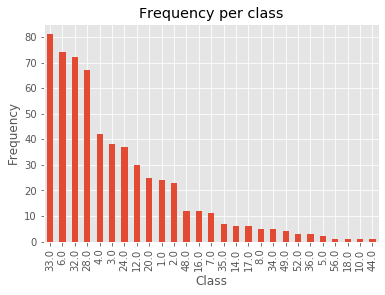

In [12]:
classes.plot(kind = 'bar')
plt.title("Frequency per class")
plt.xticks(range(len(classes)),classes.index)
plt.xlabel("Class")
plt.ylabel("Frequency")

como podemos ver no gráfico de barras plotado, há uma maior predominância da classe 33 com quase 80 instâncias ao passo que a classe 44 só tem uma, logo , temos uma base de dados extremamente desbalanceada e que provavelmente não conseguiria prever de forma adequadas os atributos que estão em menor proporção

In [13]:
df = X.join(y).rename(columns = {0:'emotions'})
df.head()

,Mean_Acc1298_Mean_Mem40_Centroid,Mean_Acc1298_Mean_Mem40_Rolloff,Mean_Acc1298_Mean_Mem40_Flux,Mean_Acc1298_Mean_Mem40_MFCC_0,Mean_Acc1298_Mean_Mem40_MFCC_1,Mean_Acc1298_Mean_Mem40_MFCC_2,Mean_Acc1298_Mean_Mem40_MFCC_3,Mean_Acc1298_Mean_Mem40_MFCC_4,Mean_Acc1298_Mean_Mem40_MFCC_5,Mean_Acc1298_Mean_Mem40_MFCC_6,...,Std_Acc1298_Std_Mem40_MFCC_12,BH_LowPeakAmp,BH_LowPeakBPM,BH_HighPeakAmp,BH_HighPeakBPM,BH_HighLowRatio,BHSUM1,BHSUM2,BHSUM3,emotions
0,0.034741,0.089665,0.091225,-73.302422,6.215179,0.615074,2.037160,0.804065,1.301409,0.558576,...,0.094923,0.051035,68.0,0.014937,136.0,2.0,0.245457,0.105065,0.405399,6.0
1,0.081374,0.272747,0.085733,-62.584437,3.183163,-0.218145,0.163038,0.620251,0.458514,0.041426,...,0.041565,0.295031,70.0,0.276366,140.0,2.0,0.343547,0.276366,0.710924,33.0
2,0.110545,0.273567,0.084410,-65.235325,2.794964,0.639047,1.281297,0.757896,0.489412,0.627636,...,0.085821,0.161574,61.0,0.000000,183.0,3.0,0.188693,0.045941,0.457372,34.0
3,0.042481,0.199281,0.093447,-80.305152,5.824409,0.648848,1.754870,1.495532,0.739909,0.809644,...,0.122330,0.043012,66.0,0.206562,132.0,2.0,0.102839,0.241934,0.351009,4.0
4,0.074550,0.140880,0.079789,-93.697749,5.543229,1.064262,0.899152,0.890336,0.702328,0.490685,...,0.189988,0.029308,100.0,0.144039,200.0,2.0,0.195196,0.310801,0.683817,8.0


juntei de volta o X e o y e mudei o nome da coluna das emoções para emotions

## Drop de colunas que só têm uma representação

In [14]:
df.shape

(593, 73)

In [15]:
single_represent = classes.loc[classes == 1 ]
#separando as classes que só tem uma representação

In [16]:
single_represent = single_represent.index
#printando essas classes
single_represent

Float64Index([56.0, 18.0, 10.0, 44.0], dtype='float64')

In [17]:
for row in single_represent:
    print(row)
    drop = df.loc[df['emotions'] == row].index #pegando o index dessas classes
    df = df.drop(index = drop[0]) #dropando as classes

56.0
18.0
10.0
44.0


In [18]:
df.shape

(589, 73)

In [19]:
df['emotions'].value_counts()

33.0    81
6.0     74
32.0    72
28.0    67
4.0     42
3.0     38
24.0    37
12.0    30
20.0    25
1.0     24
2.0     23
16.0    12
48.0    12
7.0     11
35.0     7
17.0     6
14.0     6
8.0      5
34.0     5
49.0     4
36.0     3
52.0     3
5.0      2
Name: emotions, dtype: int64

colunas com só um atributo dropadas.

## Usando Label Encoder para ficar tudo na ordem

Nesse tópico usaremos o LabelEncoder na coluna 'emotions' para deixar todos os valores preenchidos, ou seja: todos os valores de 0 - 22, visto que só temos 23 classes. O Label Encoder funcionará dando um valor de 0 a 22 para cada uma das classes, dessa maneira, não teremos números distantes e nossa base ficará mais organizada

In [20]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [21]:
df['emotions'] = encoder.fit_transform(df['emotions'])

In [22]:
df.head()

,Mean_Acc1298_Mean_Mem40_Centroid,Mean_Acc1298_Mean_Mem40_Rolloff,Mean_Acc1298_Mean_Mem40_Flux,Mean_Acc1298_Mean_Mem40_MFCC_0,Mean_Acc1298_Mean_Mem40_MFCC_1,Mean_Acc1298_Mean_Mem40_MFCC_2,Mean_Acc1298_Mean_Mem40_MFCC_3,Mean_Acc1298_Mean_Mem40_MFCC_4,Mean_Acc1298_Mean_Mem40_MFCC_5,Mean_Acc1298_Mean_Mem40_MFCC_6,...,Std_Acc1298_Std_Mem40_MFCC_12,BH_LowPeakAmp,BH_LowPeakBPM,BH_HighPeakAmp,BH_HighPeakBPM,BH_HighLowRatio,BHSUM1,BHSUM2,BHSUM3,emotions
0,0.034741,0.089665,0.091225,-73.302422,6.215179,0.615074,2.037160,0.804065,1.301409,0.558576,...,0.094923,0.051035,68.0,0.014937,136.0,2.0,0.245457,0.105065,0.405399,5
1,0.081374,0.272747,0.085733,-62.584437,3.183163,-0.218145,0.163038,0.620251,0.458514,0.041426,...,0.041565,0.295031,70.0,0.276366,140.0,2.0,0.343547,0.276366,0.710924,16
2,0.110545,0.273567,0.084410,-65.235325,2.794964,0.639047,1.281297,0.757896,0.489412,0.627636,...,0.085821,0.161574,61.0,0.000000,183.0,3.0,0.188693,0.045941,0.457372,17
3,0.042481,0.199281,0.093447,-80.305152,5.824409,0.648848,1.754870,1.495532,0.739909,0.809644,...,0.122330,0.043012,66.0,0.206562,132.0,2.0,0.102839,0.241934,0.351009,3
4,0.074550,0.140880,0.079789,-93.697749,5.543229,1.064262,0.899152,0.890336,0.702328,0.490685,...,0.189988,0.029308,100.0,0.144039,200.0,2.0,0.195196,0.310801,0.683817,7


Text(0, 0.5, 'Frequency')

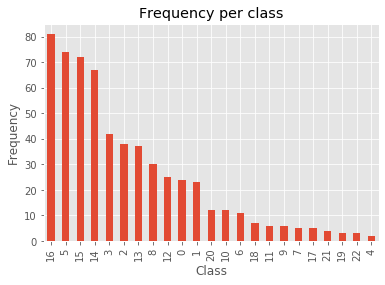

In [23]:
classes = df['emotions'].value_counts()
classes.plot(kind = 'bar')
plt.title("Frequency per class")
plt.xticks(range(len(classes)),classes.index)
plt.xlabel("Class")
plt.ylabel("Frequency")

In [24]:
classes

16    81
5     74
15    72
14    67
3     42
2     38
13    37
8     30
12    25
0     24
1     23
20    12
10    12
6     11
18     7
11     6
9      6
7      5
17     5
21     4
19     3
22     3
4      2
Name: emotions, dtype: int64

In [25]:
len(classes)

23

igualando dataset a df, para meio que criar um checkpoint nos valores, enquanto utilizo o código e faço modificações

In [26]:
dataset = df

## Balanceamento: Oversampling das classes minoritárias

Foi usada a função RandomOverSampler para produzir mais representações das classes minoritárias, de forma a deixar os dados balanceados

In [27]:
dataset.shape

(589, 73)

In [28]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(dataset.drop(columns = {'emotions'}),dataset['emotions'])

Using TensorFlow backend.
/home/itamar/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/itamar/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/itamar/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/itamar/anaconda3/lib/python3.7/site-packages/tenso

In [29]:
y_resampled.value_counts()

22    81
10    81
1     81
2     81
3     81
4     81
5     81
6     81
7     81
8     81
9     81
11    81
21    81
12    81
13    81
14    81
15    81
16    81
17    81
18    81
19    81
20    81
0     81
Name: emotions, dtype: int64

Como pode ser analisado, agora todas as classes possuem 81 representações

In [30]:
X_resampled.shape

(1863, 72)

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
#dividimos em treino e teste aleatoriamente e com 0.2 pro teste e 0.8 pro treino
X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled,test_size = 0.2, random_state = 0)

In [33]:
#agora juntaremos o X e os y do treino e os do teste
watch_test = X_test.join(y_test)
watch_train = X_train.join(y_train)

In [34]:
watch_test.shape

(373, 73)

In [35]:
#vemos que temos termos duplicados no teste
watch_test.duplicated().sum()

148

In [36]:
#dropamos os dados duplicados do teste
watch_test = watch_test.drop_duplicates()

In [37]:
watch_test.shape

(225, 73)

In [38]:
#vemos que o RandomOverSampler funciona duplicando dados
watch_train.duplicated().sum()
#Não dropamos os dados duplicados daqui, pois eles fazem parte do balanceament

970

In [39]:
watch_test.shape

(225, 73)

In [40]:
watch_train.shape

(1490, 73)

Por fim, separamos os dados de volta em treino e teste, labels e dados de predição

In [41]:
X_test,y_test = watch_test.drop(columns = {'emotions'}), watch_test['emotions']

In [42]:
X_train,y_train = watch_train.drop(columns = {'emotions'}), watch_train['emotions']

## Treino 

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score,f1_score,precision_score



# Random Forest com 100 estimators

In [120]:
classifier = RandomForestClassifier(n_estimators = 100, n_jobs = -1,verbose = 0, random_state= 82)

In [121]:
classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=82, verbose=0,
                       warm_start=False)

In [122]:
y_pred = classifier.predict(X_test)

In [123]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[ 9  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 11  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0 12  0  2  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  4  0  8  0  0  1  0  0  0  1  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 12  0  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  6  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0  0  0 15  1  0  0  0  0  0  0

Como podemos ver na matriz de confusão, percebemos que os resultados ficaram concentrados, sobretudo, na diagonal central, indicando um número alto de acertos

In [124]:
# A acurácia se refere ao número total de classificações corretas sobre
# o número total de classificações
rf_acc = accuracy_score(y_test,y_pred)
print(acc)

0.8088888888888889


In [125]:
# é a habilidade do classificador de achar os positivos
rf_recall = recall_score(y_test,y_pred,average='weighted') # sensitivity

In [126]:
# é, basicamente, a habilidade do classificador de não rotular como
# positivo uma amostra que é negativa
rf_precision = precision_score(y_test,y_pred,average='weighted')

In [127]:
#a F1 calcula uma média entre a precisão e o recall de forma a priorizar
# as classes presentes em menor proporção.
# assim, uma alta f1 indica que o classificador está também classificando
# bem as classes em menor proporção.
rf_f1 = f1_score(y_test,y_pred,average='weighted')
rf_f1

0.8300008163607892

# Random Forest com 30 estimators 

In [141]:
classifier = RandomForestClassifier(n_estimators = 30, n_jobs = -1,verbose = 0, random_state = 0,max_depth=2)

In [142]:
classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=-1,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [143]:
y_pred = classifier.predict(X_test)

In [144]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[5 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1]
 [2 1 0 0 0 0 0 0 0 0 1 0 2 0 0 0 0 5 0 0 0 1 0]
 [4 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 3 0 0 0 0 2]
 [1 0 0 0 1 0 0 2 0 0 3 0 5 0 1 0 0 1 0 1 0 0 0]
 [0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 1 0 0 1 0 1 3 0 1 0 2 0 0 4 0 1 0 0 1]
 [1 1 0 0 0 0 0 1 0 0 1 0 0 0 2 0 0 1 0 0 0 0 2]
 [0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 5 0 1 2 0 1 0 3 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 3 1 0 1 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 1 0 0 3 0 1 0 1 0 0 0 0 1 0 0 0]
 [1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 7 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 3 0 0 6 0 1 2 0 0 1 4 0 0 0 0 0 0 0 0]
 [0 0 0 0 3 0 0 4 1 1 2 0 0 0 4 0 0 1 0 0 0 0 0]
 [1 1 0 0 1 0 0 3 0 0 0 0 4 0 0 0 1 1 0 6 0 0 2]
 [9 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 5 0 3 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 3 0 0 0 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0]
 [0 1 0 0 1 0 0 1 0 

Como podemos ver na matriz de confusão, percebemos que os resultados ficaram concentrados, sobretudo, na diagonal central, indicando um número alto de acertos

In [145]:
# A acurácia se refere ao número total de classificações corretas sobre
# o número total de classificações
rf_30_acc = accuracy_score(y_test,y_pred)
print(acc)

0.8088888888888889


In [146]:
# é a habilidade do classificador de achar os positivos
rf_30_recall = recall_score(y_test,y_pred,average='weighted') # sensitivity

In [147]:
# é, basicamente, a habilidade do classificador de não rotular como
# positivo uma amostra que é negativa
rf_30_precision = precision_score(y_test,y_pred,average='weighted')

/home/itamar/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [148]:
#a F1 calcula uma média entre a precisão e o recall de forma a priorizar
# as classes presentes em menor proporção.
# assim, uma alta f1 indica que o classificador está também classificando
# bem as classes em menor proporção.
rf_30_f1 = f1_score(y_test,y_pred,average='weighted')
rf_30_f1

0.1147818051497102

In [149]:
print(rf_acc,rf_30_acc)

0.8355555555555556 0.19555555555555557


In [150]:
print(rf_precision,rf_30_precision)

0.836768169738758 0.17546516598432008


In [151]:
print(rf_recall,rf_30_recall)

0.8355555555555556 0.19555555555555557


In [152]:
print(rf_f1,rf_30_f1)

0.8300008163607892 0.1147818051497102


Podemos ver que quando diminuímos consideravelmente o n e mudamos o max_depth para dois os resultados caem consideravelmente, pois estamos limitando o potencial da floresta de criar árvores com um maior número de nós, o que acaba diminuindo a possibilidade de generalização e aprendizado da árvore

## USING KNN

In [193]:
classifier = KNeighborsClassifier(n_neighbors = 3, n_jobs = -1)

In [194]:
classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
                     weights='uniform')

In [195]:
y_pred = classifier.predict(X_test)

In [196]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[ 7  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  1  0  0]
 [ 0 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  3  6  0  0  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 10  0  0  1  0  1  0  0  0  2  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  4  0  3  1  1  1  0  1  0  0  2  1  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  1  0  0  0  1  8  0  0  0  0  0  2  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  6  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  8  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  2  0  2  0  0  8  3  0  0  0  0  0  1

In [197]:
# A acurácia se refere ao número total de classificações corretas sobre
# o número total de classificações
acc_knn_3 = accuracy_score(y_test,y_pred)
print(acc_knn_3)

0.6222222222222222


In [198]:
# é a habilidade do classificador de achar os positivos
recall_knn_3 = recall_score(y_test,y_pred,average='weighted') # sensitivity

In [199]:
# é, basicamente, a habilidade do classificador de não rotular como
# positivo uma amostra que é negativa
precision_knn_3 = precision_score(y_test,y_pred,average='weighted')

In [200]:
#a F1 calcula uma média entre a precisão e o recall de forma a priorizar
# as classes presentes em menor proporção.
# assim, uma alta f1 indica que o classificador está também classificando
# bem as classes em menor proporção.
f1_knn_3 = f1_score(y_test,y_pred,average='weighted')
f1_knn_3

0.5777762620575885

## Mudando algum atributo do KNN

Usando o número de vizinhos = 5

In [237]:
classifier = KNeighborsClassifier(weights='distance',n_neighbors = 5, n_jobs = -1,metric = 'euclidean')

In [238]:
classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='distance')

In [239]:
y_pred = classifier.predict(X_test)

In [240]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[ 9  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0 11  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 12  0  0  1  0  0  0  0  0  1  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  1  0  4  1  1  1  0  2  0  0  1  2  1  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 12  0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  6  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  2  0  0 14  1  0  0  0  0  0  0

In [241]:
# A acurácia se refere ao número total de classificações corretas sobre
# o número total de classificações
acc_knn_5 = accuracy_score(y_test,y_pred)
print(acc_knn_5)

0.7466666666666667


In [242]:
# é a habilidade do classificador de achar os positivos
recall_knn_5 = recall_score(y_test,y_pred,average='weighted') # sensitivity

In [243]:
# é, basicamente, a habilidade do classificador de não rotular como
# positivo uma amostra que é negativa
precision_knn_5 = precision_score(y_test,y_pred,average='weighted')

In [244]:
#a F1 calcula uma média entre a precisão e o recall de forma a priorizar
# as classes presentes em menor proporção.
# assim, uma alta f1 indica que o classificador está também classificando
# bem as classes em menor proporção.
f1_knn_5 = f1_score(y_test,y_pred,average='weighted')
f1_knn_5

0.7115875372632995

In [245]:
print(acc_knn_3,acc_knn_5)

0.6222222222222222 0.7466666666666667


In [246]:
print(precision_knn_3,precision_knn_5)

0.5882311314416577 0.7585666802333468


In [247]:
print(recall_knn_3,recall_knn_5)

0.6222222222222222 0.7466666666666667


In [248]:
print(f1_knn_3,f1_knn_5)

0.5777762620575885 0.7115875372632995


Nesse caso, a mudança do número de vizinhos teve pouca influência, visto que 3 e 5 são números ímpares e muito pequenos em comparação com o número de atributos. Contudo, ao mudarmos o peso, acabamos por aumentar significamente o desempenho do modelo nos dados. Ao colocarmos um pesso na distância o algoritmo acabou priorizar os vizinho mais próximos dentre os 5 escolhidos. Ao passo que no outro exemplo todos os 3 tinham a mesma influência, prioridades.